# How to compute the Radon Transform from an Image



## Defining the Image

A continous image $f(x,\ y)$ with a rectangular shape is bounded by:

1) lower left corner $(x_l, y_l)$

2) upper left corner  $(x_l, y_u)$

3) upper right corner $(x_u, y_u$

4) lower right corner $(x_u, y_l$

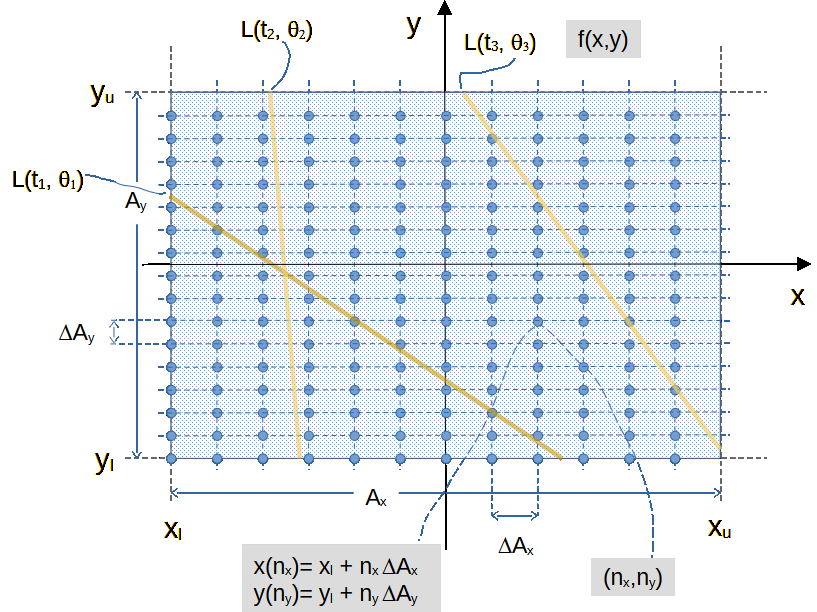

The continous image is discretized into smaller rectangles of width $\Delta A_x$ and height $\Delta A_y$. Width and height are computed from:

$$\begin{gather}
\Delta A_x = \frac{x_u - x_l}{N_x} \\
\Delta A_y = \frac{y_u - y_l}{N_y}
\end{gather}
$$

$N_x$ and $N_y$ are positve integer values (number of pixel in $x$ and $y$ direction). The lower left corner of such rectangles is defined by $x,\ y$ like this.

$$\begin{gather}
x(n_x) = x_l + n_x \cdot \Delta A_x \\
y(n_x) = y_l + n_x \cdot \Delta A_y
\end{gather}
$$

Indices $n_x,\ n_y$ are in the range:

$$\begin{gather}
0 \le n_x \le N_x-1 \\
0 \le n_y \le N_y-1
\end{gather}
$$

The discretize image is then defined by $f(x(n_x), y(n_y))$.

----

## Projection Line 

Here assume that some kind of approximation to the continous Radon transform shall be computed along a *projection* line which is specified by parameters by parameters $t,\ s,\ \theta$. For a fixed angle $\theta$ pairs $x(t,\ s),\ y(t,\ s)$ on this line are defined by.


$$\begin{gather}
x(t,\ s) = t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right) \\
y(t, s) = t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right)
\end{gather}
$$

A projection line which does not intersect with the image boundaries does not contribute to the Radon transform.

The figure shows projection line for three angles $\theta_1,\ \theta_2,\theta_3$ and parameters $t_1,\ t_2,\ t_3$. 

If an projection line intersects with the image boundaries the intersection points are denoted $x_1,\ y_1$ and $x_2,\ y_2$. By convention $x_1 \le x_2$. Depending on the slope of a projection line either $y_2 \le y_1$ (slope is negative of zero) or $y_2 \gt y_1$ (slope is postive) may occur.

Let is define the slope by

$$
slope = \frac{y_2-y_1}{x_2-x_1}
$$

A projection line  starts at point $x_1, y_1$ and ends at point $x_2, y_2$. Generally these start and end points are no grid points $n_x,\ n_y$ of the discrete image.

To compute an approximation of a projection/Radon transform these points are discretized into points $n_{x1},\ n_{y1}$ and $n_{x2},\ n_{y2}$. The rules how to compute $n_{x1},\ n_{x2}$ from $x_1,\ x_2$ and $n_{y1},\ n_{y2}$ from $y_1,\ y_2$ are described here:

1) compute intermediate discrete points $(\tilde{n}_{x1}, \tilde{n}_{y1})$, $(\tilde{n}_{x2}, \tilde{n}_{y2})$:

    a) $\tilde{n}_{x1} = round((x_1 - x_l)/\Delta A_x)$

    b) $\tilde{n}_{y1} = round((y_1 - y_l)/\Delta A_y)$

    c) $\tilde{n}_{x2} = round((x_2 - x_l)/\Delta A_x)$

    d) $\tilde{n}_{y2} = round((y_2 - y_l)/\Delta A_y)$

2) apply correction to intermediate points

    a) $n_{x1} = \begin{cases} N_x-1 & if \ \tilde{n}_{x1} \ge N_x \\
       \tilde{n}_{x1} & otherwise \end{cases}$

    b) $n_{y1} = \begin{cases} N_y-1 & if \ \tilde{n}_{y1} \ge N_y \\
       \tilde{n}_{y1} & otherwise \end{cases}$

    c) $n_{x2} = \begin{cases} N_x-1 & if \ \tilde{n}_{x2} \ge N_x \\
       \tilde{n}_{x2} & otherwise \end{cases}$

    d) $n_{y2} = \begin{cases} N_y-1 & if \ \tilde{n}_{y2} \ge N_y \\
       \tilde{n}_{y2} & otherwise \end{cases}$

With starting and end point of the discretized projection line defined these points and its connecting line are depicted in the next figure.


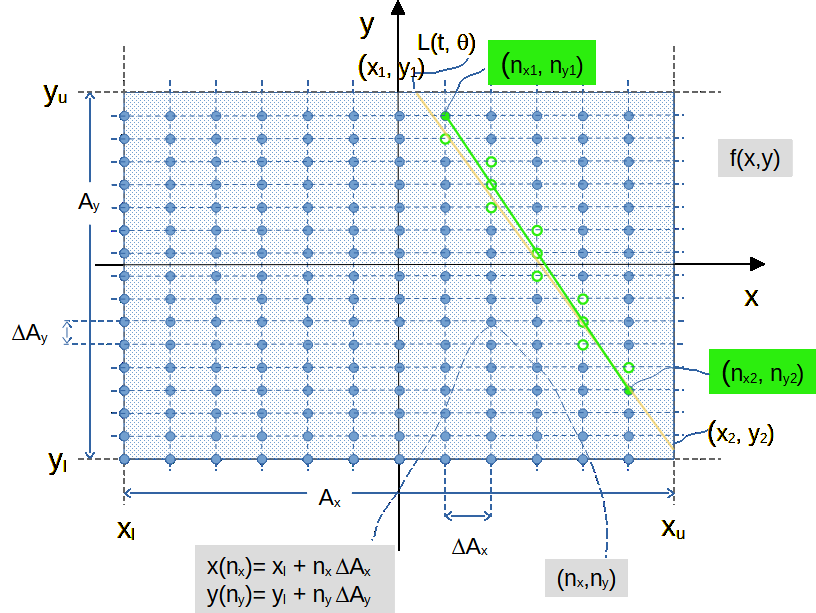


The discrete projection line shall be defined as starting at point $n_{x1},\ n_{y1}$ and going through points in proximity to the line connecting the start and the end point. The figure gives an idea how this can be accomplished.

The slope of the discrete projection line has been changed by some small amount due to the change of starting and end points. We define

$$
slope_d = \frac{(n_{y2}- n_{y1}) \cdot \Delta A_y}{(n_{x2}- n_{x1}) \cdot \Delta A_x}
$$

For a more explicit description two cases shall be condsidered:

**case $n_{x2}-n_{x1} \ge |n_{y2} - n_{y1}|$**

1) create a list of x-indices ${n_{x1}, n_{x1} +1, ..., n_{x2}}$

2) for each x-index in this list compute the corresponding continous y-value. Round this y-value to the nearest integer. By this the corresponding y-index is found. 

**case $n_{x2}-n_{x1} \lt |n_{y2} - n_{y1}|$**

1) create a list of y-indices ${n_{y1}, n_{y1} +1, ..., n_{y2}}$

2) for each y-index in this list compute the corresponding continous x-value. Round this x-value to the nearest integer. By this the corresponding x-index is found. 

The result is a list of image-points in the vicinity of the discrete projection line. The list of image points is used to look up the values $f(n_x,\ n_y)$ of the discrete image. Summing over looked up values yields the value of the projection along the discretized projection line.

## Example

1) For a *low resolution* image the intersection points are computed from function `intersections`

2) The digital projection line is computed from function `digitalProjectionLine`

3) The projection line (a straight interconnection of discretized intersection points) is displayed.

4) The points which approximate the projection line are displayed. Clearly these points do not coincide exactly with the projection line.

In [55]:
import sys, os
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), 'modules'))
from RadonUtils import intersections, digitalProjectionLine, projectionSingleLine, projectionMultiLine, sinoGram

In [56]:
fname1 = './images/radon_tf_img3.npy'
img1 = np.load(fname1)
Ny, Nx = img1.shape
print(f"nr. rows (Ny): {Ny}; nr. columns (Nx): {Nx}")

nr. rows (Ny): 60; nr. columns (Nx): 80


In [57]:
# define physical dimensions
x_l = -2
x_u = 3
y_l = -1
y_u = 3

In [58]:
# define parameters of projection line
t_val = 1.0
theta_deg = 30.0

# compute intersections
intersectionCount, intersectionPoints = intersections(t_val, theta_deg, x_l, x_u, y_l, y_u)
point_x1y1, point_x2y2 = intersectionPoints
print(f"point (x1,y1): {point_x1y1}; point (x2,y2): {point_x2y2}")

point (x1,y1): [-0.5773502691896254, 3]; point (x2,y2): [1.7320508075688772, -1]


In [59]:
xIndices, yIndices, points = digitalProjectionLine(intersectionPoints, Nx, Ny, x_l, x_u, y_l, y_u)
print(f"points: {points}")
n_x1, n_y1, n_x2, n_y2 = points

points: [23, 59, 60, 0]


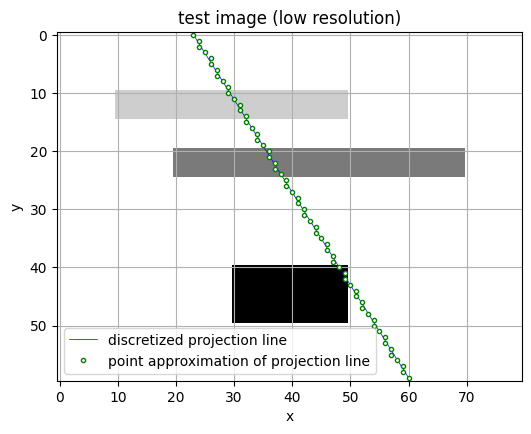

In [60]:
fig1 = plt.figure(1, figsize=[6, 6])
ax_f1 = fig1.add_subplot(1, 1, 1)
# plot of image
ax_f1.imshow(img1, cmap='Greys' )

# when plotting projection lines image coordinates must be used
# discretized projection line
ax_f1.plot([n_x1, n_x2], [Ny - 1 - n_y1, Ny - 1 - n_y2], color='b', linewidth=0.5, label='discretized projection line')
# point approximation along the projection line
ax_f1.plot(xIndices, Ny - 1 - yIndices, marker='.', markerfacecolor='w', color='g', linewidth=0, label='point approximation of projection line')

ax_f1.grid(True)
ax_f1.set_ylabel('y')
ax_f1.set_xlabel('x')
ax_f1.legend()
ax_f1.set_title('test image (low resolution)');

## Computing a Projection

A projection is computed from  a set of projection lines for a fixed angle $\theta$ and a range of $t$ values. 

The range $t$ values of the projection depends on several factors. However a rough estimate can be obtained like this:

$t_{max} = max\left[ \sqrt{x_l^2 + y_l^2},\ \sqrt{x_l^2 + y_u^2},\ \sqrt{x_u^2 + y_u^2},\ \sqrt{x_u^2 + y_l^2} \right] $

Thus a plausible range estimate is:

$$
-t_{max} \le t \le t_{max}
$$

Within this range projections shall be computed for $N_t$ number of points with equidistant spacing.

## Example

An example shall demonstrate the procedure:

1) projections are computed for a range a appropriately chosen $t$ values

2) projections are computed for a set of angles $\theta$

3) projections are computed by Python function `projectionMultiLine`

In [61]:
# define physical dimensions
x_l = -2
x_u = 3
y_l = -1
y_u = 3

N_t = 501 # number of projection lines
r1 = math.sqrt(x_l**2 + y_l**2)
r2 = math.sqrt(x_l**2 + y_u**2)
r3 = math.sqrt(x_u**2 + y_l**2)
r4 = math.sqrt(x_u**2 + y_u**2)
t_max = max(r1, r2, r3, r4)

# the vector of t values (see comments on how to determine this range)
t_vec = np.linspace(-t_max, t_max, N_t)

# load image
fname2 = './images/radon_tf_img2.npy'
img2 = np.load(fname2)

# get number of pixels in y, x direction
# the image is represented in image coordinates (0,0) is the
# upper left corner of the image
Ny, Nx = img2.shape

# a list of projection angles for which projections shall be computed
phi_deg_list = [0, 30, 50, 90, 120]
projections = []

# compute projections
for phi_deg in phi_deg_list:
    projectionVec= projectionMultiLine(t_vec, phi_deg, img2, x_l, x_u, y_l, y_u, placeholder=math.nan, debug=True)
    projections.append(projectionVec)


## Plot Test Image and some Projections

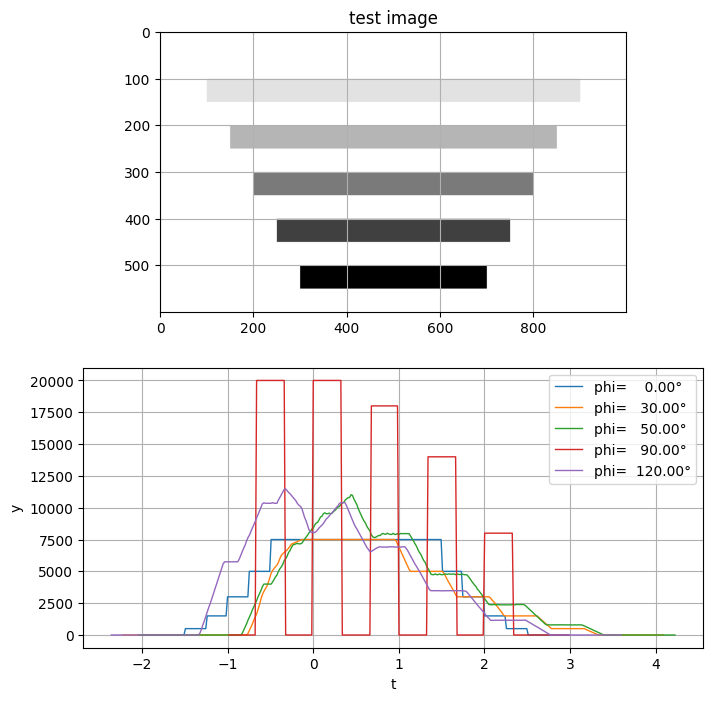

In [62]:
fig2 = plt.figure(2, figsize=[8, 8])
ax_f21 = fig2.add_subplot(2, 1, 1)
# plot of image
ax_f21.imshow(img2, cmap='Greys' )
ax_f21.grid(True)
ax_f21.set_title('test image')

ax_f22 = fig2.add_subplot(2, 1, 2)
# plot of projection for each angle in list
for k, phi_deg in enumerate(phi_deg_list):
    ax_f22.plot(t_vec, projections[k], label=f"phi={phi_deg:8.2f}°", linewidth=1)
    
ax_f22.grid(True)
ax_f22.set_ylabel('y')
ax_f22.set_xlabel('t')
ax_f22.legend();

## Sinogram

**definition**

A sinogram is the set of projections computed for a range of $t,\ \theta$ values like

$$\begin{gather}
t_{start} \le t \le t_{stop} \\
0 \le \theta \lt 180°
\end{gather}
$$

arranging the projection values in a matrix and displaying the matrix as an image gives a structure which is referrend to as sinogram.

In this example, the row index of the sinogram corresponds to the projection angle. The angles are arranged in ascending order (index 0: smallest angle, ...)

The data of the sinogram and other supporting data (nr of pixels, angles, t-values, etc.) are stored in file using `Numpy npz` file format. These data may be later used when attempting to reconstruct the original *image* from its projections/sinogram.

Finally a plot of the sinogram shows that for such a simple test image a fairly regular structure is obtained.

In [63]:
N_theta1 = 400
theta_vec1_deg = np.linspace(0, 179, N_theta1, endpoint=False)
# the sinogram
sinogram_bars = sinoGram(t_vec, theta_vec1_deg, img2, x_l, x_u, y_l, y_u, placeholder=math.nan, debug=True)

# save the sinogram to a file (for other experiments)
fname_sino = './sinograms/sinogram_stripes.npz'
np.savez(fname_sino, N_theta=N_theta1, theta_vec_deg=theta_vec1_deg, t_vec=t_vec, sinogram=sinogram_bars)

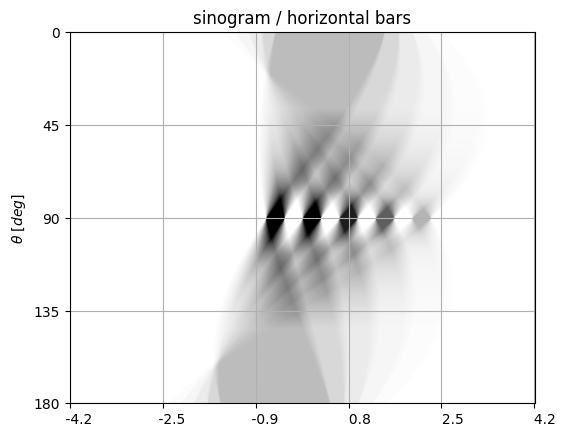

In [64]:
fig3 = plt.figure(3, figsize=[6, 6])
ax_f31 = fig3.add_subplot(1, 1, 1)
# plot of image
ax_f31.imshow(sinogram_bars, cmap='Greys' )
ax_f31.set_ylabel('$\\theta \ [deg]$ ')

yticks = [0, 100, 200, 300, 399]
ytickLabels = ['0', '45', '90', '135', '180']
ax_f31.set_yticks(yticks, ytickLabels)

t_start = t_vec[0]
t_stop = t_vec[-1]
del_t = t_stop - t_start
xticks = np.array([0, 100, 200, 300, 400, 500])
xtickLabels = []
for xtick in xticks:
    xtickLabels.append(f"{t_start + xtick * del_t/N_t:8.1f}")

ax_f31.set_xticks(xticks, xtickLabels)
ax_f31.grid(True)
ax_f31.set_title('sinogram / horizontal bars');

## Why is it called a Sinogram ? 

Consider all projection lines defined by $t, \theta$ which pass through a point at $x_p, y_p$. Assume that the value $f(x_p, y_p)$ at this point has a value of $v$ and all other image points have *zero* value (point image). Then all projections have a value of $v$.

From the equation

$$
\begin{pmatrix} x_p \\ y_p \end{pmatrix} = t \cdot \begin{pmatrix} cos\left( \theta \right) \\ sin\left( \theta \right) \end{pmatrix} + s \cdot \begin{pmatrix} -sin\left( \theta \right) \\ cos\left( \theta \right) \end{pmatrix}
$$

the values of $t$ and $s$ are determined for a given angle $\theta$.

$$
t = x_p \cdot cos\left( \theta \right) + y_p \cdot sin\left( \theta \right)
$$

$$
s = -x_p \cdot sin\left( \theta \right) + y_p \cdot cos\left( \theta \right)
$$

For our purpose only the equation for $t$ is interesting. To gain more insight the equation is rewritten:

$$
t = \sqrt{x_{p}^2 + y_{p}^2 } \cdot \left( \frac{x_p}{\sqrt{x_{p}^2 + y_{p}^2 }} \cdot cos\left( \theta \right) + \frac{y_p}{\sqrt{x_{p}^2 + y_{p}^2}} \cdot sin\left( \theta \right) \right)
$$

Using definitions 

$$
sin\left( \phi \right) = \frac{x_p}{\sqrt{x_{p}^2 + y_{p}^2 }}
$$

$$
cos\left( \phi \right) = \frac{y_p}{\sqrt{x_{p}^2 + y_{p}^2 }}
$$

and

$$
tan\left( \phi \right) = \frac{sin\left( \phi \right)}{cos\left( \phi \right)} = \frac{x_p}{y_p}
$$

the equation for $t$ can now be written more compactly as:

$$
t = \sqrt{x_{p}^2 + y_{p}^2 } \cdot \left( sin\left( \phi \right) \cdot cos\left( \theta \right) + cos\left( \phi \right)  \cdot sin\left( \theta \right) \right)
$$

and finally as:

$$
t = \sqrt{x_{p}^2 + y_{p}^2 } \cdot sin\left( \theta + \phi\right)
$$

**Summary**

A single point $x_p, y_p$ of a figure $f(x,\ y)$ is transformed into a *sinogram* which is *sinusoidal* dependent on angle $\theta$. The phase constant  $\phi$ depends on point coordinates with $\phi = arctan\left( \frac{x_p}{y_p} \right)$


## Sinogram of an Image with 3 Points

The sinogram of an image with only 3 non-zero pixels is computed. The sinogram is displayed. As could be expected it is composed
of 3 sinusoids.

1) define image parameters such as nr of pixels, physical dimenstion of image, t-values

2) create image with 3 points

3) compute the sinogram

4) plot the sinogram

### Define an Image with 3 points

In [65]:
# the rectangular region
Ny2 = 200
Nx2 = 200

# physical dimension of region
x_l2 = 0
x_u2 = Nx2 - 1
y_l2 = 0
y_u2 = Ny2 - 1

# parameters for t-vector and angle vector
t_min2 = -300
t_max2 = 300
N_t2 = 600
t_vec2 = np.linspace(t_min2, t_max2, N_t2)
N_theta2 = 400
theta_vec2_deg = np.linspace(0, 179, N_theta2)

# image: 3 points
img_3p = np.zeros((Ny2, Nx2), dtype=np.float64)
# colum , row of point1 (p1)
nc_p1 = 50
nr_p1 = 50
# colum , row of point2 (p2)
nc_p2 = 150
nr_p2 = 130
# colum , row of point3 (p3)
nc_p3 = 100
nr_p3 = 180

img_3p[nr_p1, nc_p1] = 1
img_3p[nr_p2, nc_p2] = 1
img_3p[nr_p3, nc_p3] = 1

# compute sinogram
sinogram_3points = sinoGram(t_vec2, theta_vec2_deg, img_3p, x_l2, x_u2, y_l2, y_u2, placeholder=math.nan, debug=True)

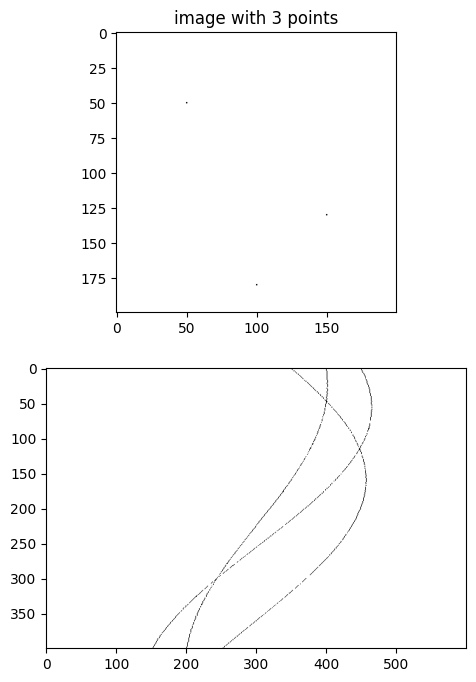

In [66]:
fig_width = 8
fig_height = 8
fig4 = plt.figure(4, figsize=[fig_width, fig_height])

ax_f41 = fig4.add_subplot(2, 1, 1)
ax_f41.imshow(img_3p, cmap='binary')
ax_f41.set_title(f"image with 3 points")

ax_f42 = fig4.add_subplot(2, 1, 2)
a = ax_f42.imshow(sinogram_3points, cmap='binary')

## Other test images



In [67]:
imgFile3 = "images/tree_dublin.png"
img3 = cv2.imread(imgFile3, cv2.IMREAD_GRAYSCALE)
Nx3 = img3.shape[1]
Ny3 = img3.shape[0]
print(f"size of image: {img3.size} ; shape of image: {img3.shape}")

# Define boundaries of the rectangular region
aspect_ratio = Ny3 / Nx3
width = 4
height = width * aspect_ratio
x_l3 = -width/2  # left x
x_u3 = width/2   # right x
y_l3 = -height/2 # bottom y
y_u3 = height/2  # top y

r1 = math.sqrt(x_l3**2 + y_l3**2)
r2 = math.sqrt(x_l3**2 + y_u3**2)
r3 = math.sqrt(x_u3**2 + y_l3**2)
r4 = math.sqrt(x_u3**2 + y_u3**2)
t_max = max(r1, r2, r3, r4)

N_t3 = 800
t_vec3 = np.linspace(-t_max, t_max, N_t3)

N_theta3 = 600
theta_vec3_deg = np.linspace(0, 179, N_theta3)

# compute sinogram
sinogram_tree = sinoGram(t_vec3, theta_vec3_deg, img3, x_l3, x_u3, y_l3, y_u3, placeholder=math.nan, debug=True)

# save the sinogram to a file (for other experiments)
fname_sino = './sinograms/sinogram_trees.npz'
np.savez(fname_sino, N_theta=N_theta3, theta_vec_deg=theta_vec3_deg, t_vec=t_vec3, sinogram=sinogram_tree)

size of image: 1920000 ; shape of image: (1200, 1600)


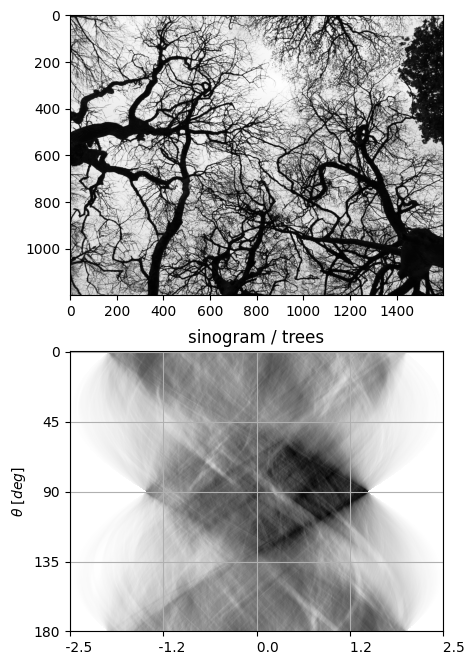

In [68]:
fig5 = plt.figure(5, figsize=[8, 8])

ax_f51 = fig5.add_subplot(2, 1, 1)
# plot of image
ax_f51.imshow(img3, cmap='Greys_r' )

ax_f52 = fig5.add_subplot(2, 1, 2)
# plot of image
ax_f52.imshow(sinogram_tree, cmap='Greys' )
ax_f52.set_ylabel('$\\theta \ [deg]$ ')

yticks = [0, 150, 300, 450, 599]
ytickLabels = ['0', '45', '90', '135', '180']
ax_f52.set_yticks(yticks, ytickLabels)

t_start = t_vec3[0]
t_stop = t_vec3[-1]
del_t = t_stop - t_start
xticks = np.array([0, 200, 400, 600, 800])
xtickLabels = []
for xtick in xticks:
    xtickLabels.append(f"{t_start + xtick * del_t/N_t3:8.1f}")

ax_f52.set_xticks(xticks, xtickLabels)
ax_f52.grid(True)
ax_f52.set_title('sinogram / trees');

In [69]:
imgFile4 = "images/lamp_dublin_1.png"
img4 = cv2.imread(imgFile4, cv2.IMREAD_GRAYSCALE)

Nx4 = img4.shape[1]
Ny4 = img4.shape[0]
print(f"size of image: {img4.size} ; shape of image: {img4.shape}")

# Define boundaries of the rectangular region
aspect_ratio = Ny4 / Nx4
width = 4
height = width * aspect_ratio
x_l4 = -width/2  # left x
x_u4 = width/2   # right x
y_l4 = -height/2 # bottom y
y_u4 = height/2  # top y

N_t4 = 800
t_vec4 = np.linspace(-width, width, N_t4)

N_theta4 = 600
theta_vec4_deg = np.linspace(0, 179, N_theta4)

# compute sinogram
sinogram_lamp = sinoGram(t_vec4, theta_vec4_deg, img4, x_l4, x_u4, y_l4, y_u4, placeholder=math.nan, debug=True)

# save the sinogram to a file (for other experiments)
fname_sino = './sinograms/sinogram_lamp.npz'
np.savez(fname_sino, N_theta=N_theta4, theta_vec_deg=theta_vec4_deg, t_vec=t_vec4, sinogram=sinogram_lamp)

size of image: 1920000 ; shape of image: (1600, 1200)


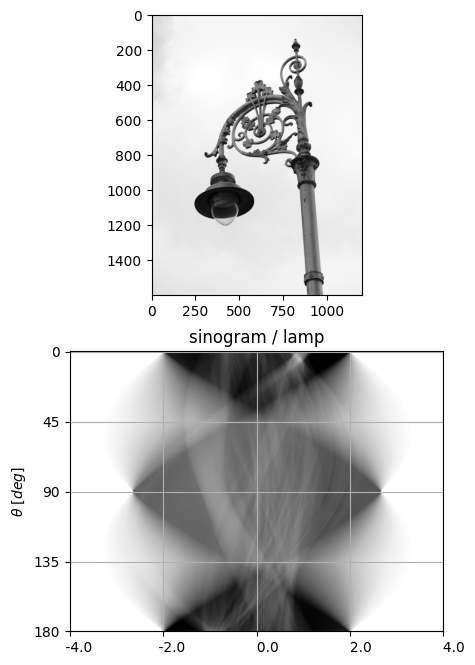

In [70]:
fig6 = plt.figure(6, figsize=[8, 8])

ax_f61 = fig6.add_subplot(2, 1, 1)
# plot of image
ax_f61.imshow(img4, cmap='Greys_r' )

ax_f62 = fig6.add_subplot(2, 1, 2)
# plot of image
ax_f62.imshow(sinogram_lamp, cmap='Greys' )
ax_f62.set_ylabel('$\\theta \ [deg]$ ')

yticks = [0, 150, 300, 450, 599]
ytickLabels = ['0', '45', '90', '135', '180']
ax_f62.set_yticks(yticks, ytickLabels)

t_start = t_vec4[0]
t_stop = t_vec4[-1]
del_t = t_stop - t_start
xticks = np.array([0, 200, 400, 600, 800])
xtickLabels = []
for xtick in xticks:
    xtickLabels.append(f"{t_start + xtick * del_t/N_t4:8.1f}")

ax_f62.set_xticks(xticks, xtickLabels)
ax_f62.grid(True)
ax_f62.set_title('sinogram / lamp');